## Minerando Dados
(www.minerandodados.com.br|www.minerandodados.com.br)


** Bibliotecas Utilizadas**

In [15]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import svm

** Dados do Spotify**

In [6]:
dataset = pd.read_csv('C:\scripts\minerandodados\cafecomcodigo\data.csv')

In [7]:
dataset.drop(['id','song_title'], axis=1, inplace=True)

In [8]:
# Separa as classes dos dados
classes = dataset.target
dataset.drop('target', axis=1, inplace=True)

** Teste Sem Aplica PCA**

** LabelEncoder**

In [9]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

# Condifica coluna artist
inteiros = enc.fit_transform(dataset['artist'])
dataset['artist_inteiros'] = inteiros

# Dropa coluna artist
dataset.drop('artist', axis=1, inplace=True)

** Função Acuracia**

In [10]:
def Acuracia(clf,X,y):
    resultados = cross_val_predict(clf, X, y, cv=5)
    return metrics.accuracy_score(y,resultados)

** Criando Pipeline**

In [11]:
pip_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC())
])

In [100]:
# Quantidade de colunas da base
len(dataset.columns)

14

**Teste o classificador sem utilizar o PCA**

In [12]:
# Dados sem PCA
Acuracia(pip_1,dataset,classes)

0.676251859196827

# Aplicando o PCA nos Dados

**Scale os dados**

In [13]:
dt_scaler = StandardScaler().fit_transform(dataset)

**Aplicando o PCA**

In [16]:
pca = PCA(n_components=13)
componentes = pca.fit_transform(dt_scaler)

In [18]:
componentes

array([[-0.28438799, -0.9450467 , -0.89317091, ..., -0.71560871,
        -1.00466423,  0.36419457],
       [ 1.07578864, -0.96242949, -0.29893467, ...,  1.55316398,
        -0.86720546,  0.45179223],
       [ 0.21497402, -1.57180393, -0.91601412, ..., -1.27365293,
        -0.98675712,  0.08098296],
       ...,
       [-1.75638481,  0.60345023, -1.51584974, ...,  0.24064891,
        -0.32655178, -0.36162342],
       [-1.33012142,  0.91066606, -0.79536381, ..., -1.6037977 ,
         0.57277135, -0.33982098],
       [-1.38269659,  1.91252249, -0.55170387, ...,  0.55130427,
         0.04188868,  0.30182106]])

In [22]:
# Numero de componentes
pca.n_components_

13

In [23]:
# Numero de amostras
pca.n_samples_

2017

In [98]:
# Imprime a taxa de variância dos componentes.
pca.explained_variance_ratio_

array([0.20327767, 0.10896546, 0.09435611, 0.08051576, 0.07515124,
       0.07091718, 0.06898376, 0.06370217, 0.05663948, 0.0532448 ,
       0.04686314, 0.0381314 ])

In [24]:
# Imprime a taxa de variância dos componentes em percentual
np.round(pca.explained_variance_ratio_, decimals=3)*100

array([20.3, 10.9,  9.4,  8.1,  7.5,  7.1,  6.9,  6.4,  5.7,  5.3,  4.7,
        3.8,  2.7])

<IPython.core.display.Javascript object>


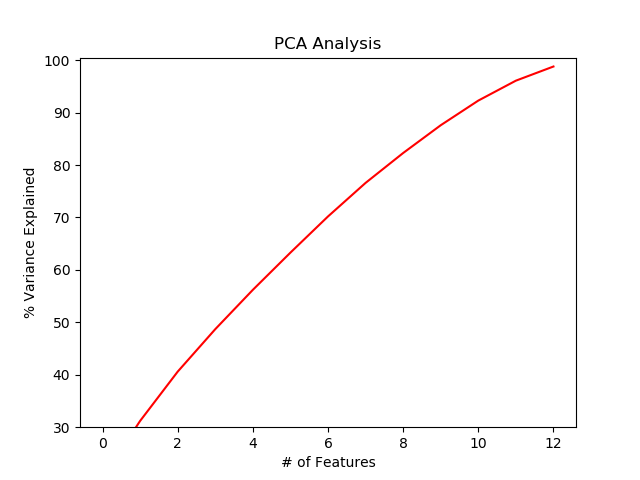

In [27]:
# Plota Variância por número de Componentes.
%matplotlib notebook
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.plot(var, color="red")

# Testando a Acurácia com PCA

In [28]:
Acuracia(pip_1,componentes,classes)

0.6807139315815568

In [30]:
# Testando o PCA com 8 componentes:
pca = PCA(n_components=8)
componentes = pca.fit_transform(dt_scaler)

In [31]:
# Testando a acurácia:
Acuracia(pip_1,componentes,classes)

0.6281606346058503

# PCA como Features para o Modelo

In [32]:
# Testando o PCA com 2 componentes:
pca = PCA(n_components=2)
features = pca.fit_transform(dt_scaler)

In [33]:
# 2 componentes
features

array([[-0.28409836, -0.94443422],
       [ 1.07669602, -0.95923234],
       [ 0.21502172, -1.57159199],
       ...,
       [-1.75681974,  0.60186215],
       [-1.33126548,  0.90618335],
       [-1.38228805,  1.91371337]])

In [53]:
# Transforma os objetos em dataframes.
dt_scaler = pd.DataFrame(dt_scaler)
features = pd.DataFrame(features)

# Concatena o Dataframe final
dt_scaler = pd.concat([dt_scaler,features], axis=1)

In [58]:
# Quantidade de colunas
len(dt_scaler.columns)

16

In [59]:
# Testando a acurácia:
Acuracia(pip_1,dt_scaler,classes)

0.6737729300941993